In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation

In [3]:
# load the dataset

In [4]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


# 2.EDA

In [13]:
# Check the missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [15]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [17]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

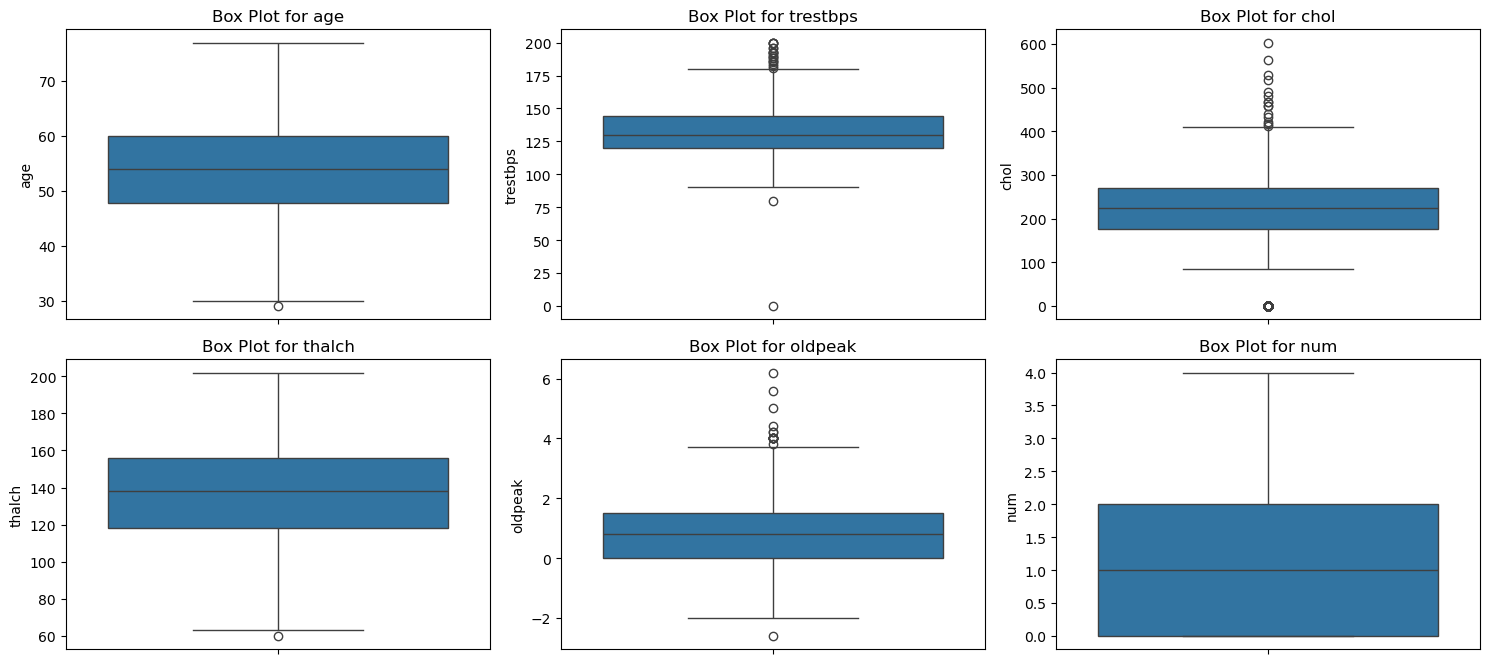

In [320]:
# Plotting box plots for each numerical feature to detect outliers

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust layout as needed based on the number of columns
    sns.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
plt.tight_layout()
plt.show()

In [322]:
# Checking for Inconsistencies.
# Check unique values for categorical columns (if any)
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].unique()}")

## Histogram

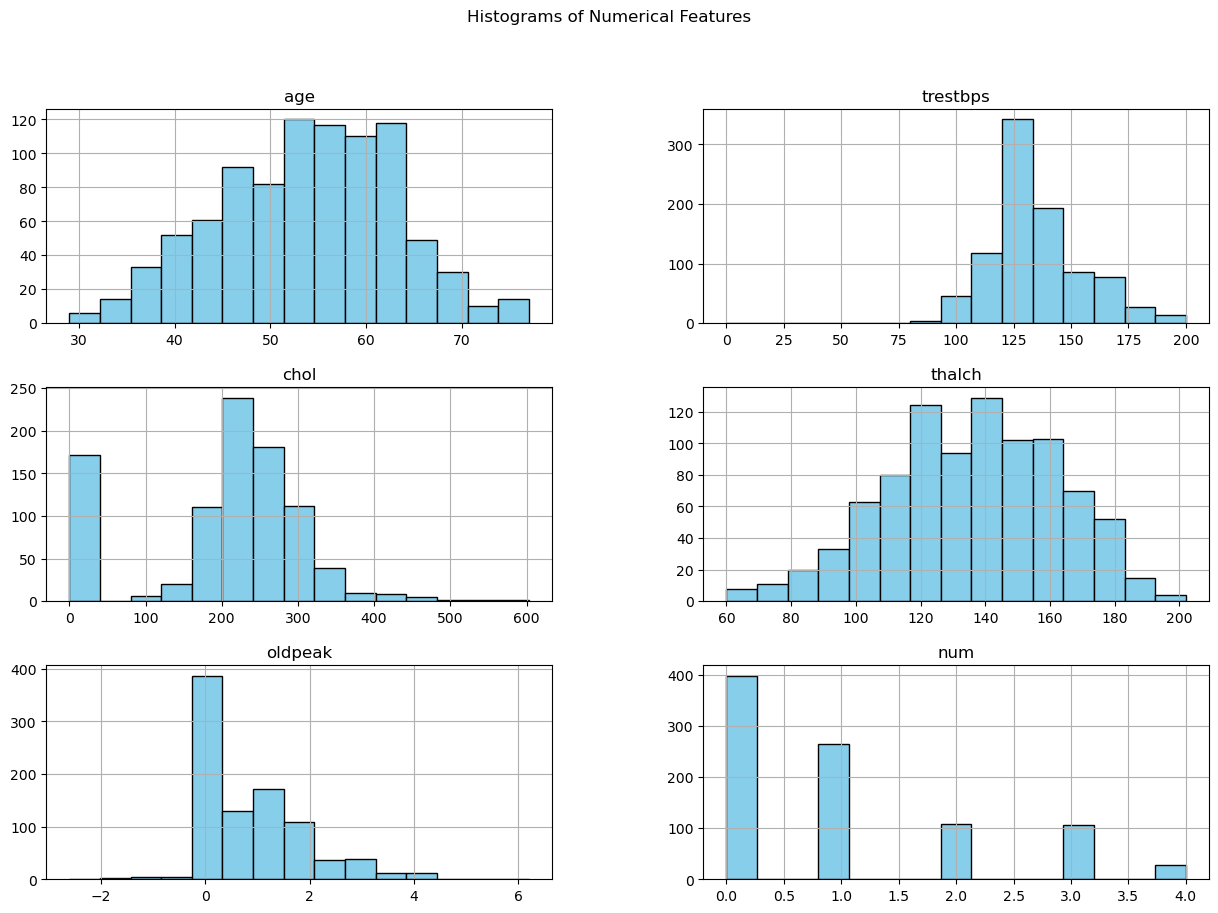

In [325]:
# Plot histograms for numerical features to view distributions
df[numerical_columns].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

# 3. Feature Engineering

In [328]:
# to encode categorical variables,we will One Hot Encoder  using get_dummies.

In [330]:
# This method creates a new binary (0 or 1) column for each category in categorical features

In [332]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,num,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,3,145,233,1,0,150,2.3,0,False,False,False,False,False,False,False
1,41,1,1,135,203,0,1,132,0.0,0,False,False,False,True,False,False,False
2,57,1,0,140,192,0,1,148,0.4,0,False,False,False,True,False,False,False
3,52,1,3,118,186,0,0,190,0.0,0,False,False,False,True,False,False,False
4,57,1,0,110,201,0,1,126,1.5,0,True,False,False,True,False,False,False


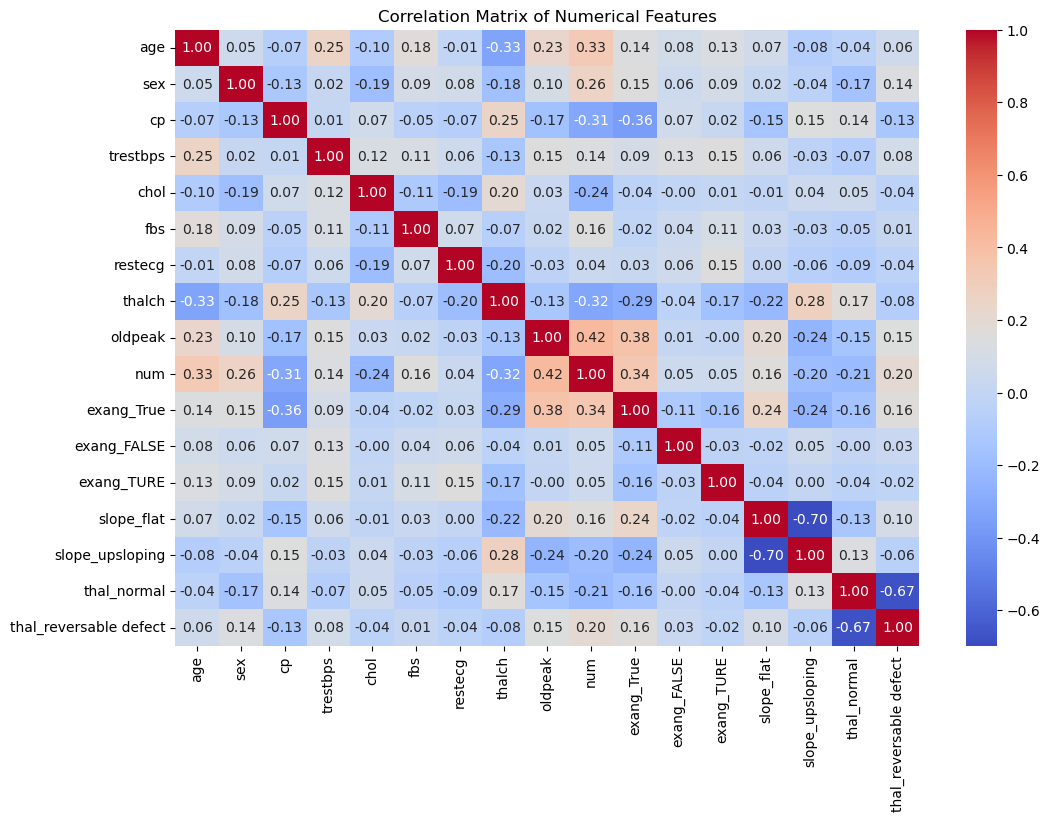

In [334]:
# Plot correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [336]:
# Handle missing values, if any ( filling with the mean)
df.fillna(df.mean(), inplace=True)

In [338]:
# Separate features and target
features = df.drop('num', axis=1)  # Replace 'target_column' with the actual target column name
target = df['num']

In [340]:
# Scaling the features
scaler= StandardScaler()

In [342]:
scaled_features=scaler.fit_transform(features)

In [344]:
scaled_features

array([[ 1.00602683,  0.51441613,  2.32027607, ..., -0.69894534,
        -0.85992069, -0.784639  ],
       [-1.39756029,  0.51441613,  0.23225756, ..., -0.69894534,
        -0.85992069, -0.784639  ],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.69894534,
        -0.85992069, -0.784639  ],
       ...,
       [ 0.24124911,  0.51441613,  1.27626682, ..., -0.69894534,
         1.16289793, -0.784639  ],
       [ 0.24124911,  0.51441613,  1.27626682, ..., -0.69894534,
        -0.85992069, -0.784639  ],
       [ 0.35050307,  0.51441613, -0.81175169, ..., -0.69894534,
        -0.85992069,  1.27447144]])

# 4. Decision Tree Classification

In [347]:
#split the dataset into training and testing

In [349]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,target,train_size=0.8,random_state=50)

In [351]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(726, 16)
(726,)
(182, 16)
(182,)


In [353]:
# applying Decision Tree classifier
dt_model=DecisionTreeClassifier(random_state=50)

In [355]:
# train model
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=50)

In [357]:
#predict model
y_pred=dt_model.predict(x_test)

In [359]:
# Evaluate the model

In [361]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred ,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

In [363]:
# Calculate the predicted probabilities for the positive class
y_proba = dt_model.predict_proba(x_test)  # Probability of positive class (1)

In [365]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba,multi_class='ovr',average='macro')

In [367]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.42857142857142855
Precision: 0.40357605357605353
Recall: 0.42857142857142855
F1 Score: 0.41533292689952744
ROC-AUC Score: 0.5575589837987402


# 5. Parameter Tuning

In [370]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],     # Different max depths to experiment with
    'min_samples_split': [2, 5, 10, 20],       # Various minimum samples for splitting a node
    'criterion': ['gini', 'entropy']      # Try both 'gini' and 'entropy' for split criteria
}

In [372]:
# Initialize GridSearchCV

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

In [374]:
# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20, None],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [375]:
# print best parameters.
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [376]:
# print best score
print("Best Score Accuracy:", grid_search.best_score_)

Best Score Accuracy: 0.5660462919225319


In [377]:
# Use the best estimator for predictions
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=50)

In [382]:
y_pred_best = best_model.predict(x_test)

In [384]:
accuracy_score(y_test,y_pred_best)

0.4945054945054945

# 6. Model Evaluation and Analysis

In [387]:
# Evaluate the tuned model
print("Classification Report for Tuned Model:")
print(classification_report(y_test, y_pred_best))

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        75
           1       0.38      0.71      0.49        51
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00         7

    accuracy                           0.49       182
   macro avg       0.21      0.29      0.24       182
weighted avg       0.38      0.49      0.42       182



# Decision Tree Visualization

In [390]:
class_names=best_model.classes_.astype(str)
class_names

array(['0', '1', '2', '3', '4'], dtype='<U21')

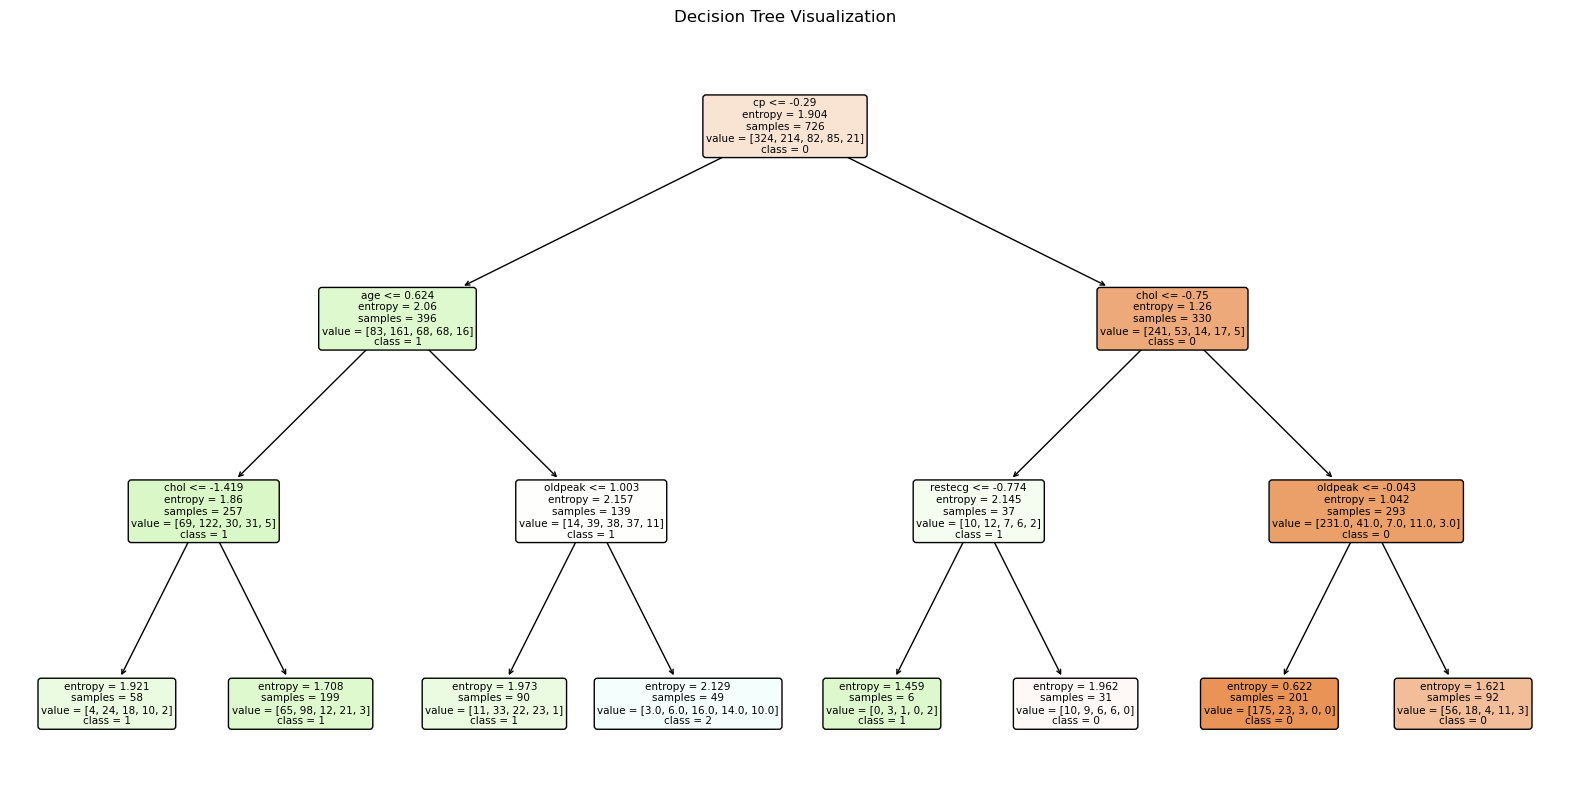

In [392]:
plt.figure(figsize=(20, 10))  # Set a larger figure size for readability
plot_tree(best_model, 
          filled=True,                 # Colors based on class
          feature_names=df.columns,  # Names of features
          class_names=best_model.classes_.astype(str),  # Class labels
          rounded=True)                # Rounded nodes for better readability
plt.title("Decision Tree Visualization")
plt.show()


# Interview Querstions

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance? 


## ANSWER:
## Decision tree models have several hyperparameters that control their behavior and performance. The most common ones include:

# 1. max_depth
Description: Limits the depth of the tree.
### Effect:
A shallow tree (low max_depth) reduces overfitting but may lead to underfitting.
A deeper tree allows for more complex decision boundaries but increases the risk of overfitting.

# 2. min_samples_split
Description: The minimum number of samples required to split a node.
### Effect:
Higher values prevent the tree from splitting nodes with very few samples, promoting simpler models that reduce overfitting.
Lower values allow more splits, leading to a more complex tree and increased risk of overfitting.
# 3. min_samples_leaf
Description: The minimum number of samples a leaf node must have.
### Effect:
Higher values encourage larger leaf nodes, which reduce model complexity and overfitting.
Lower values allow smaller leaf nodes, potentially capturing more noise.
# 4. max_features
Description: The number of features to consider when looking for the best split.
### Effect:
Reducing max_features introduces randomness and can improve performance by reducing overfitting (especially in ensemble methods like Random Forests).
Setting it to the total number of features allows the tree to consider all features, potentially improving accuracy but increasing overfitting risk.
# 5. criterion
Description: The function used to measure the quality of a split. Common options include:
1.gini (Gini impurity)
2.entropy (Information gain)
### Effect:
Affects how splits are chosen but often has a minimal effect on overall performance.
Choice can be dataset-dependent (e.g., entropy may work better for imbalanced classes).
# 6. max_leaf_nodes
Description: The maximum number of leaf nodes in the tree.
### Effect:
Limits the tree’s size, helping to control overfitting and reduce complexity.
Can lead to underfitting if set too low.
# 7. min_impurity_decrease
Description: A node will split only if the impurity decrease is greater than or equal to this value.
### Effect:
Higher values create simpler trees by requiring more significant improvements for splits, reducing overfitting.
Lower values allow more splits, increasing the tree's complexity.
# 8. splitter
Description: The strategy used to choose the split at each node:
best: Chooses the best split.
random: Chooses a random split.
## Effect:
Using random can add variability and may help prevent overfitting in small datasets.


# 2. What is the difference between the Label encoding and One-hot encoding?

### Both Label Encoding and One-Hot Encoding are techniques for converting categorical data into numerical formats that can be used by machine learning algorithms. However, they work differently and are suited for different scenarios.

### Label Encoding converts categorical labels into numeric values by assigning a unique integer to each category.
###  One-Hot Encoding converts each category into a separate binary column, where 1 indicates the presence of the category and 0 indicates its absence.

###  Label encoding captures the ordinal relationships between categories, while one-hot encoding captures the magnitude of relationships.
### In short, label encoding is best if there is an ordinal relationship between categories, one-hot encoding is best if there is no ordinal relationship between categories,

## We apply One-Hot Encoding when:

### 1.The categorical feature is not ordinal (like the countries above)
### 2. The number of categorical features is less so one-hot encoding can be effectively applied

## We apply Label Encoding when:

### 1. The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
### 2. The number of categories is quite large as one-hot encoding can lead to high memory consumptionLabel Encoding vs One Hot Encoding vs Ordinal Encoding

# ----- THE END -----